In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Load CSV data and split variables
labeled_geo_tesla_data = pd.read_csv('labeled_tesla_geo_data.csv', index_col='Unnamed: 0', parse_dates=['created_utc'])

labeled_geo_tesla_data['created_utc'] = pd.to_datetime(labeled_geo_tesla_data['created_utc'])
labeled_geo_tesla_data['sentiment'] = labeled_geo_tesla_data['bert_label'].map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})
labeled_geo_tesla_data['state'] = labeled_geo_tesla_data['state'].str.title()
geo_data = labeled_geo_tesla_data.dropna(subset=['state'])

In [21]:
# Group by state and sentiment
state_grouped = geo_data.groupby(['state', 'sentiment']).size().unstack(fill_value=0)

# Define color mapping for sentiment
color_map = {
    'Negative': 'red',
    'Neutral': 'gray',
    'Positive': 'green'
}

# Reorder columns to match color map order
state_grouped = state_grouped[['Negative', 'Neutral', 'Positive']]

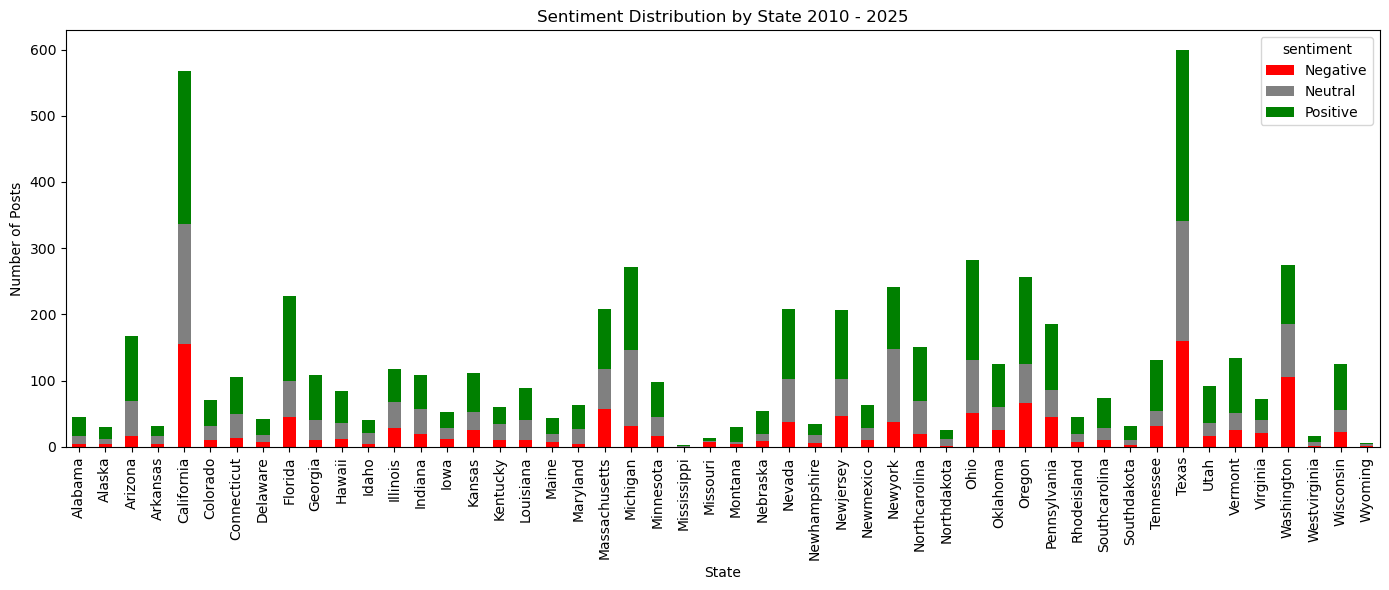

In [22]:
# Bar chart: Sentiment distribution by state
state_grouped.plot(kind='bar', stacked=True, figsize=(14, 6), color=[color_map[col] for col in state_grouped.columns])
plt.title('Sentiment Distribution by State 2010 - 2025')
plt.xlabel('State')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()